In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

In [12]:
batch_size = 128
learning_rate = 0.001
num_epochs = 10

In [13]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


model_mobilenet = models.mobilenet_v2(pretrained=True)

In [14]:
num_ftrs = model_mobilenet.classifier[1].in_features
model_mobilenet.classifier[1] = nn.Linear(num_ftrs, 10)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
model_mobilenet = model_mobilenet.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_mobilenet = optim.Adam(model_mobilenet.parameters(), lr=learning_rate)

In [17]:
def train(model, optimizer):
    total_step = len(train_loader)
    loss_list = []
    accuracy_list = []
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        accuracy = 100 * correct / total
        loss_list.append(loss.item())
        accuracy_list.append(accuracy)

    return loss_list, accuracy_list

In [18]:
loss_mobilenet, accuracy_mobilenet = train(model_mobilenet, optimizer_mobilenet)

Epoch [1/10], Step [100/469], Loss: 0.0923
Epoch [1/10], Step [200/469], Loss: 0.0383
Epoch [1/10], Step [300/469], Loss: 0.0709
Epoch [1/10], Step [400/469], Loss: 0.0243
Epoch [2/10], Step [100/469], Loss: 0.0831
Epoch [2/10], Step [200/469], Loss: 0.0343
Epoch [2/10], Step [300/469], Loss: 0.1069
Epoch [2/10], Step [400/469], Loss: 0.0341
Epoch [3/10], Step [100/469], Loss: 0.0222
Epoch [3/10], Step [200/469], Loss: 0.0348
Epoch [3/10], Step [300/469], Loss: 0.0183
Epoch [3/10], Step [400/469], Loss: 0.0083
Epoch [4/10], Step [100/469], Loss: 0.0342
Epoch [4/10], Step [200/469], Loss: 0.0312
Epoch [4/10], Step [300/469], Loss: 0.0073
Epoch [4/10], Step [400/469], Loss: 0.0279
Epoch [5/10], Step [100/469], Loss: 0.0207
Epoch [5/10], Step [200/469], Loss: 0.0642
Epoch [5/10], Step [300/469], Loss: 0.0021
Epoch [5/10], Step [400/469], Loss: 0.0747
Epoch [6/10], Step [100/469], Loss: 0.0330
Epoch [6/10], Step [200/469], Loss: 0.0137
Epoch [6/10], Step [300/469], Loss: 0.0921
Epoch [6/10

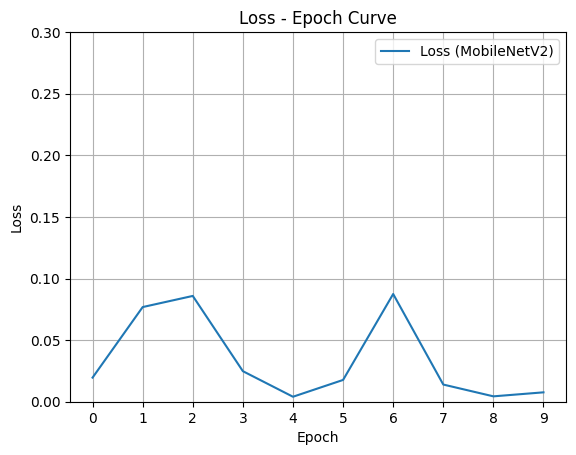

In [19]:
plt.plot(loss_mobilenet, label='Loss (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss - Epoch Curve')
plt.grid(True)
plt.xticks(range(0,10))
plt.legend()
plt.ylim(0,0.3)
plt.show()

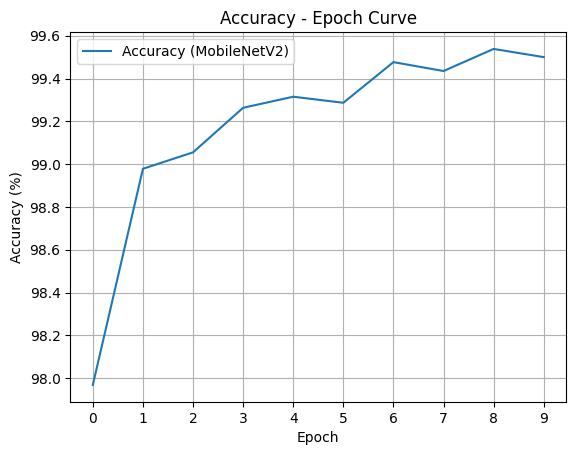

In [20]:
plt.plot(accuracy_mobilenet, label='Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy - Epoch Curve')
plt.grid(True)
plt.xticks(range(0,10))
plt.legend()
plt.show()

## به دلیل سنگین بودن این مدل نسبت به شبکه 1لایه و شبکه 2لایه آموزش و اجرای این شبکه زمان بیشتری می برد.(هر ایپاک 5 دقیقه) علاوه بر این دقت نیز با شبکه های قبلی تقریبا برابر است. لذا باز هم برای این مساله ترجیح با همان شبکه کانولوشنی تک لایه می باشد.